In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('BreastCancerData.csv')

In [3]:
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1].values

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

* As part of data engineering, we did feature scaling on the dataset

## K-Means without PCA

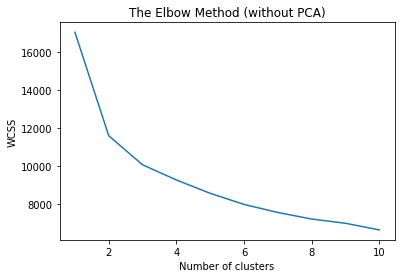

In [5]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method (without PCA)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
print(f"WCSS for no. of clusters = 2: {wcss[2]}")

WCSS for no. of clusters = 2: 10061.797818243695


* Using the elbow method, we can see that the optimal number of clusters is 2

## K-Means with PCA

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]


In [8]:
pca = PCA(n_components=3)
X = pca.fit_transform(X)

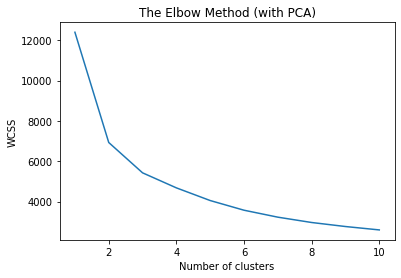

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method (with PCA)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
print(f"WCSS for no. of clusters = 2: {wcss[2]}")

WCSS for no. of clusters = 2: 5422.816606122149


## Analysis of K-Means with and without PCA

* When all 30 features from the dataset were used in the K-Means model, the WCSS for 2 clusters was 10061.80
* However, when PCA was performed on the 30 features, and the top 3 principal components were extracted and used in the K-Means model, the WCSS for 2 clusters was 5422.82
* Therefore, we conclude that PCA produced better results for our K-Means model

## Training of K-Means model on top 3 principal components

In [17]:
import time

kmeans = KMeans(n_clusters = 2)

start = time.time()
clusters = kmeans.fit_predict(X)

## K-Means model training time

In [16]:
print(f"Training time: {stop - start}s")

Training time: 0.024625539779663086s


In [12]:
np.unique(clusters)

array([0, 1])

In [15]:
print("Cluster 1: ", dataset.iloc[clusters == 0, 0].values, "\n")
print("Cluster 2: ", dataset.iloc[clusters == 1, 0].values, "\n")

Cluster 1:  [   842302    842517  84300903  84348301  84358402    843786    844359
  84458202    844981  84501001  84610002    846226  84667401  84799002
  84862001    849014   8511133    851509    852552    852631    852763
    852781    852973    853201    853401    853612  85382601    854002
    854039    854253    854268    855625    857010     85715    857392
    857637    857793    858986  85922302    859283    859471    859575
    859717   8610404   8610637   8610862   8611161   8611555   8611792
   8612399  86135502    861598    862028     86208    863030     86355
     86409    864729    864877     86517    865423    866203    866458
    866674      8670  86730502    867739    868826    869104    869691
   8710441   8711202   8711803    871201   8712289   8712729   8712766
     87164  87281702    873592    873593    874858    875263  87556202
    875938    877159    877486    877500    877989    878796     87880
 881046502   8810703 881094802   8810955   8810987   8811842  881

* From K-Means, we deduced that the optimal number of clusters using WCSS to be 2
* The patient ids have been grouped into cluster 1 and cluster 2

## Plotting of the 3 principal comonents

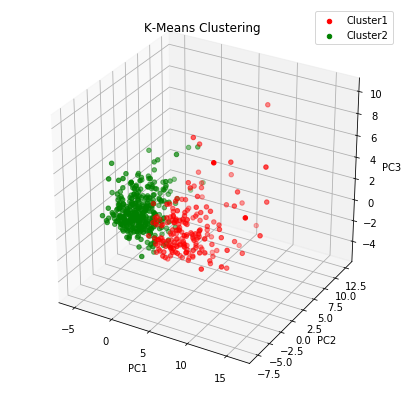

In [14]:
from mpl_toolkits.mplot3d import Axes3D

colors = 'rgbkcmy'

fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')

for i in np.unique(clusters):
    ax.scatter3D(X[clusters==i,0],
                 X[clusters==i,1],
                 X[clusters==i,2],
                 color=colors[i], label='Cluster' + str(i + 1))

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.legend()
plt.title('K-Means Clustering')
plt.show()